# Make efficiency map plots for trained fitters

In [1]:
import train as tn
reload(tn)

import plotting
reload(plotting)

import matplotlib.pyplot as plt
#plt.style.use('seaborn-ticks')
plt.style.use('seaborn-poster')
%matplotlib inline
#%matplotlib notebook

import numpy as np

from pprint import pprint

import xgboost

Welcome to ROOTaaS 6.06/08


In [2]:
def plot_efficiency_map(fitter,feedClass=True):
    class_grid,class_eff_map = fitter.effMap('class',[(300,0,300),(300,0,3.)])
    print(class_grid)
    recoPtGrid =  np.hstack([class_grid,class_eff_map]) if feedClass else class_grid
    recoPt_grid,recoPt_eff_map = fitter.effMap('recoPt',recoPtGrid)

    plotting.efficiency_map(class_grid[:,1],class_grid[:,0],class_eff_map,figsize=(21,14),xlabel="|y|",ylabel="p_T",
                        layout=(3,None))
    plt.subplots_adjust(hspace = 0.25, wspace = 0.3, top=0.88)

    plotting.efficiency_map(recoPt_grid[:,1],recoPt_grid[:,0],recoPt_eff_map,figsize=(21,56),xlabel="|y|",ylabel="p_T",
                        layout=(3,None))
    plt.subplots_adjust(hspace = 0.25, wspace = 0.1, top=0.93)
    
    resummed = np.array(map(lambda y: recoPt_eff_map[:,y].sum(), map(lambda x: range(x+1,22,3), range(3)) )).transpose()
    classwise = class_eff_map[:,1:].sum(axis=0)

    print(resummed / classwise)
    print(resummed.sum() / classwise.sum())

In [3]:
# path,name = "jobs/Train_Configurable_binned_3495","Train_Configurable_binned_3495"

path,name = "jobs/Train_Configurable_xgboost_3807378","Train_Configurable_xgboost_3807378"
fitter = tn.IO.load(name,path,nodata=True)

loading pickle jobs/Train_Configurable_xgboost_3807378/Train_Configurable_xgboost_3807378.pkl.gz


[[  5.00000000e-01   5.00000000e-03]
 [  5.00000000e-01   1.50000000e-02]
 [  5.00000000e-01   2.50000000e-02]
 ..., 
 [  2.99500000e+02   2.97500000e+00]
 [  2.99500000e+02   2.98500000e+00]
 [  2.99500000e+02   2.99500000e+00]]
[ 1.03797662  1.04762185  0.92213136]
0.967256


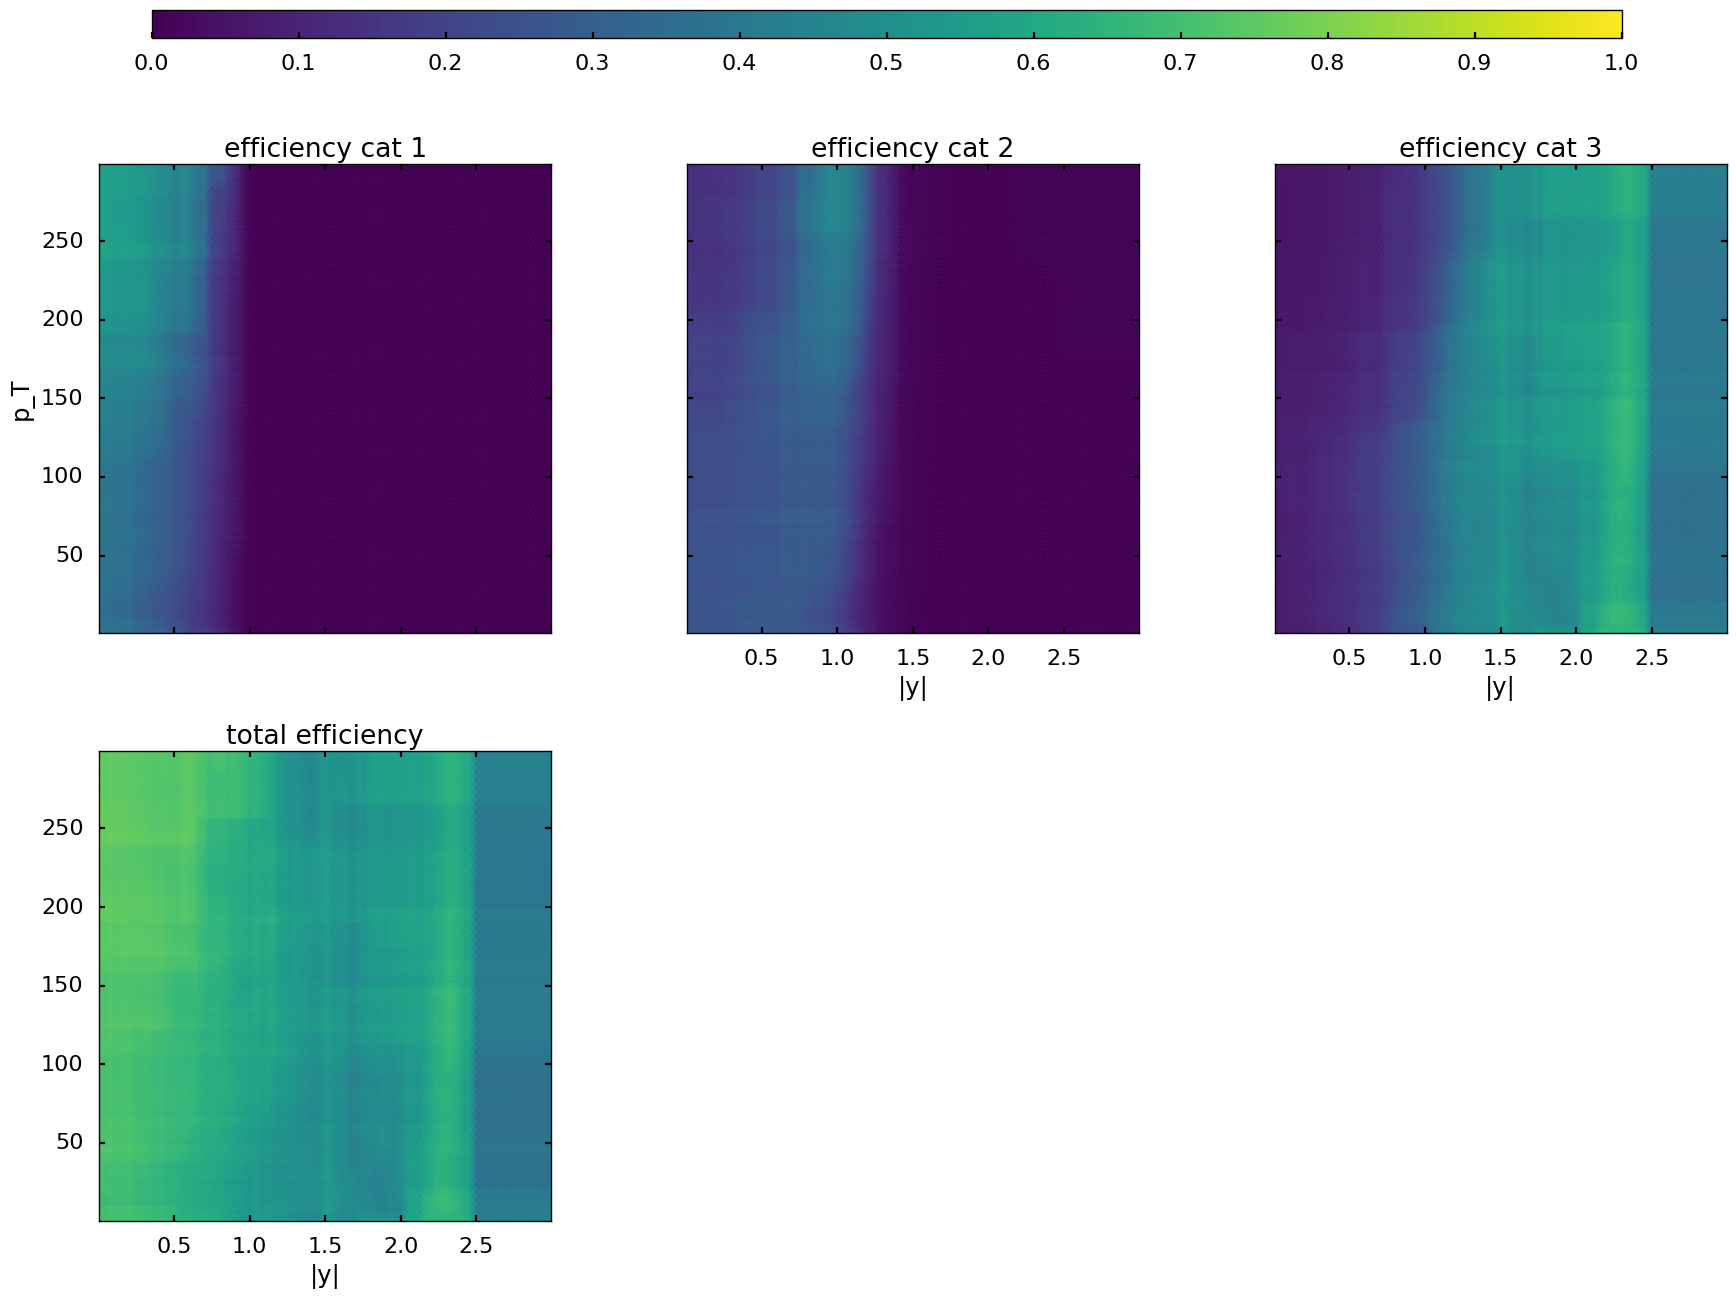

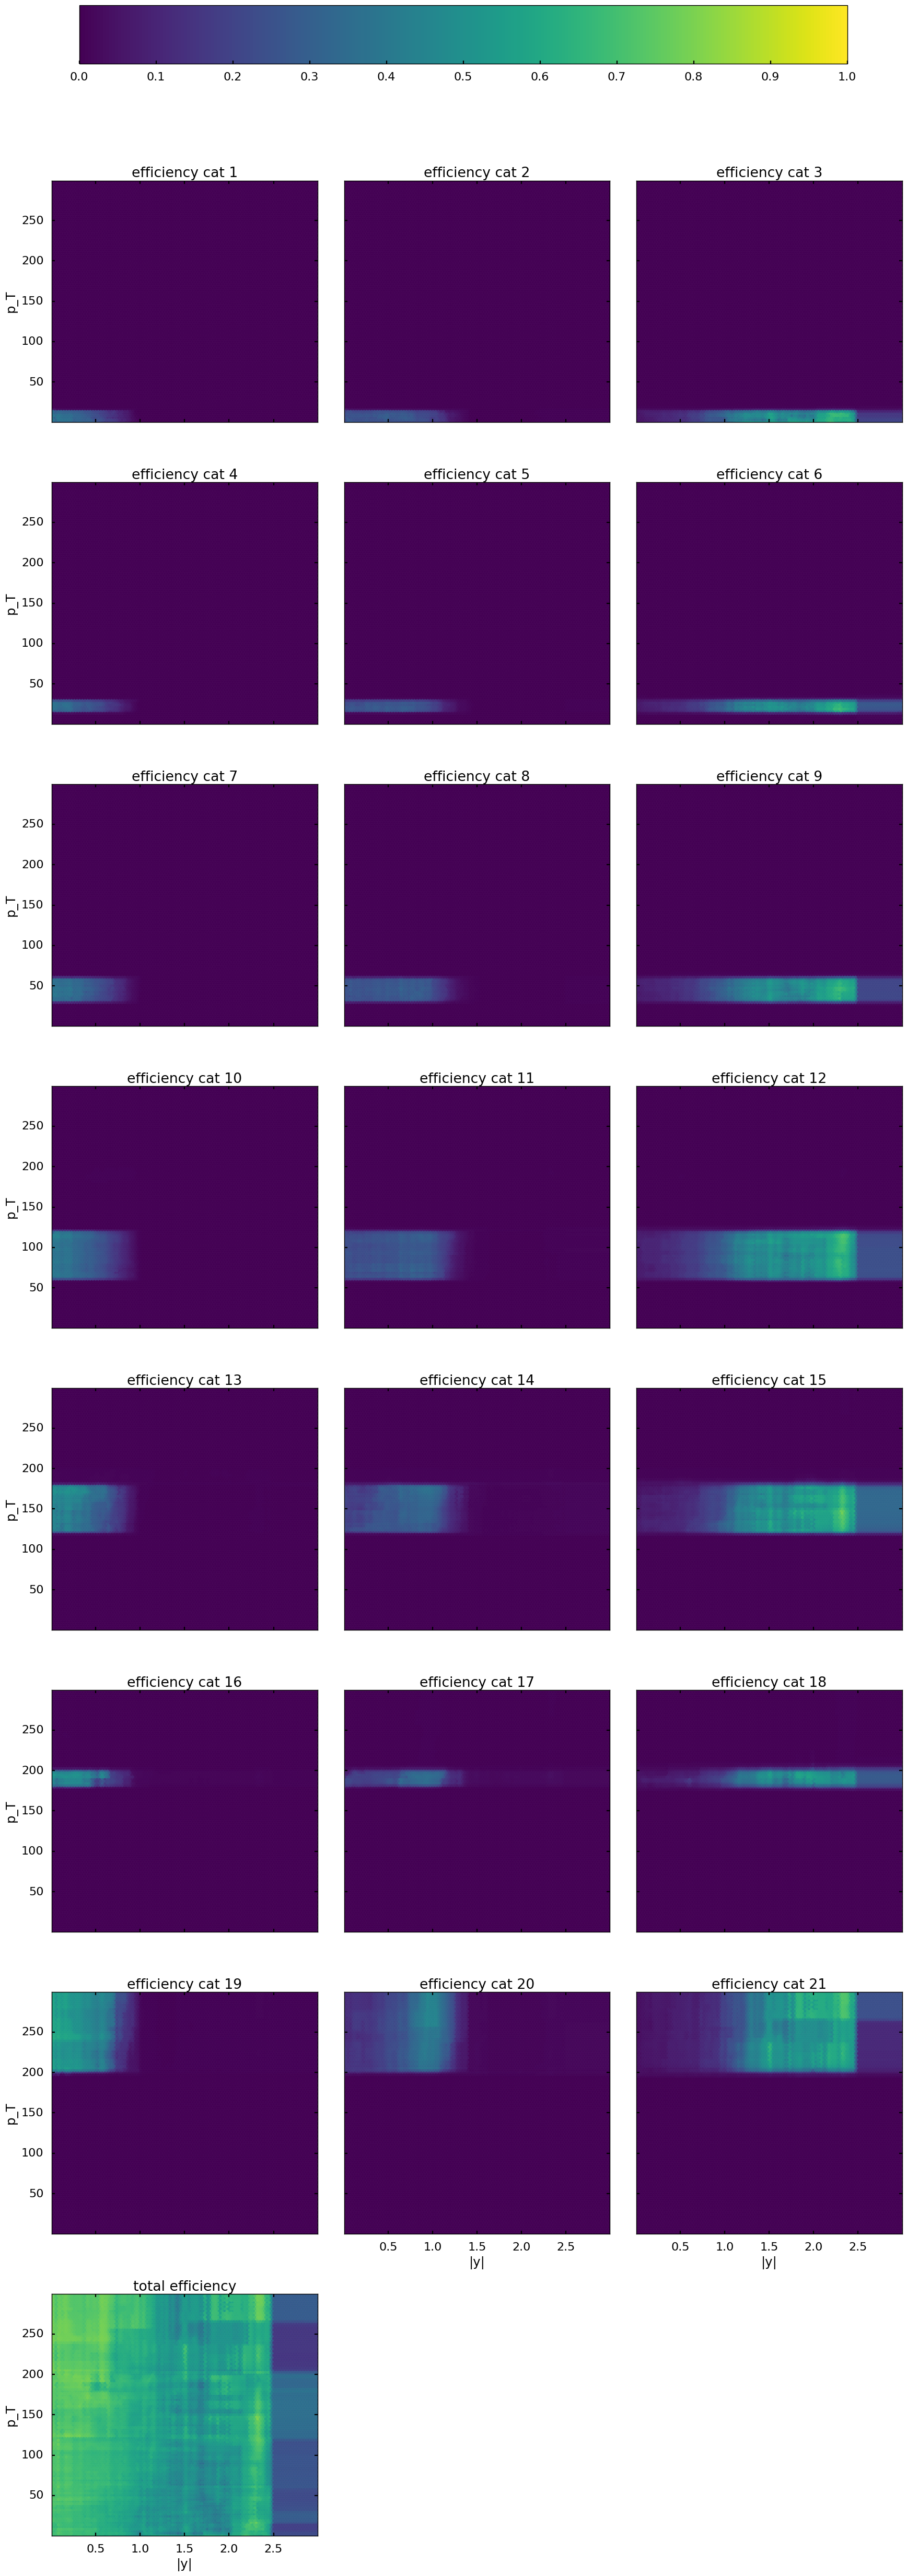

In [4]:
plot_efficiency_map(fitter,True)

In [3]:
%%bash

ls jobs

binned.json
binned.json~
sklearn.json
sklearn.json~
train_batch.sh
train_batch.sh~
Train_Configurable_binned_3495
Train_Configurable_binned_3810367
Train_Configurable_sklearn_3807377
Train_Configurable_sklearn_3810310
Train_Configurable_xgboost_3807378
xgboost.json
xgboost.json~


In [3]:
# path,name = "jobs/Train_Configurable_binned_3495","Train_Configurable_binned_3495"

path,name = "jobs/Train_Configurable_binned_16569","Train_Configurable_binned_16569"
fitter = tn.IO.load(name,path,nodata=True)

loading pickle jobs/Train_Configurable_binned_16569/Train_Configurable_binned_16569.pkl.gz


[[  5.00000000e-01   5.00000000e-03]
 [  5.00000000e-01   1.50000000e-02]
 [  5.00000000e-01   2.50000000e-02]
 ..., 
 [  2.99500000e+02   2.97500000e+00]
 [  2.99500000e+02   2.98500000e+00]
 [  2.99500000e+02   2.99500000e+00]]
[ 1.00121852  1.0004629   0.90805091]
0.946907432978


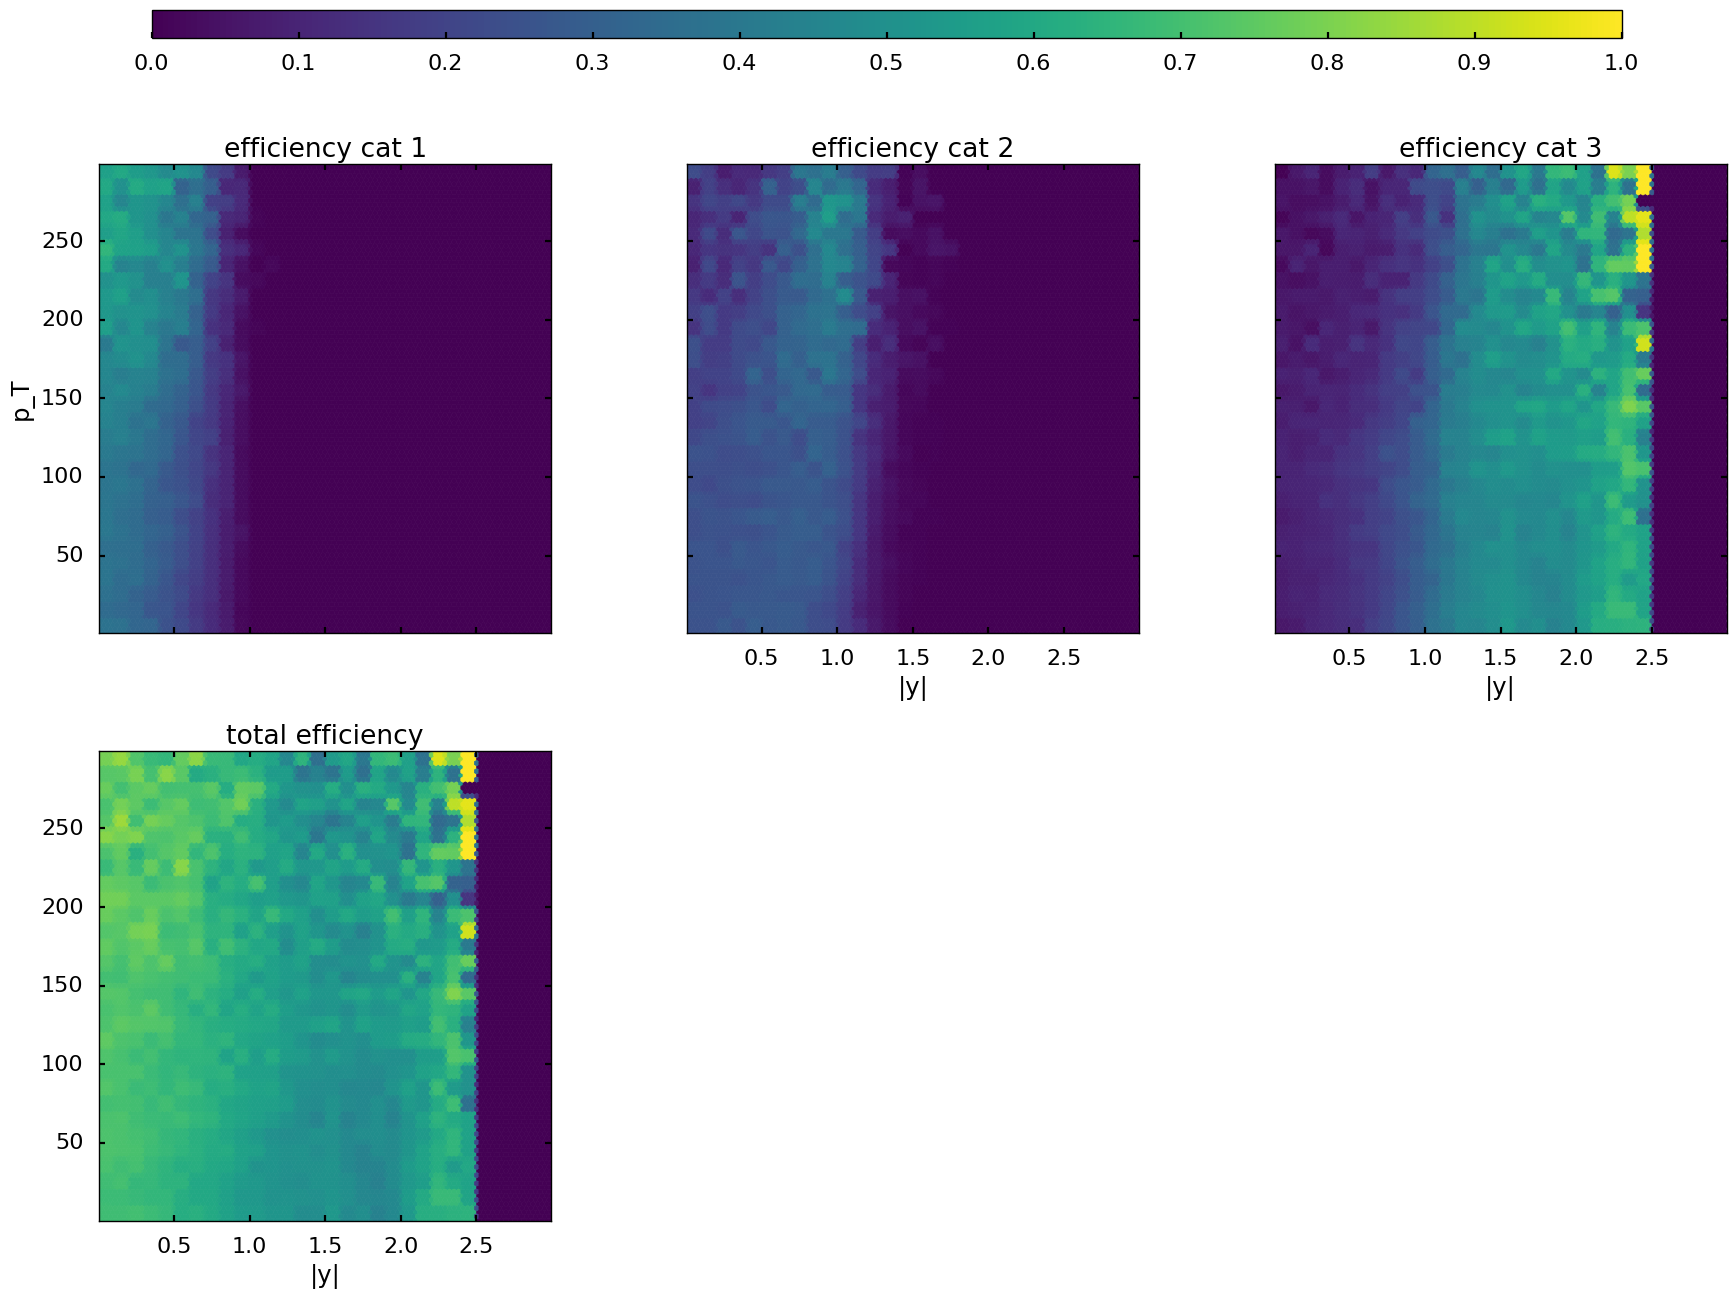

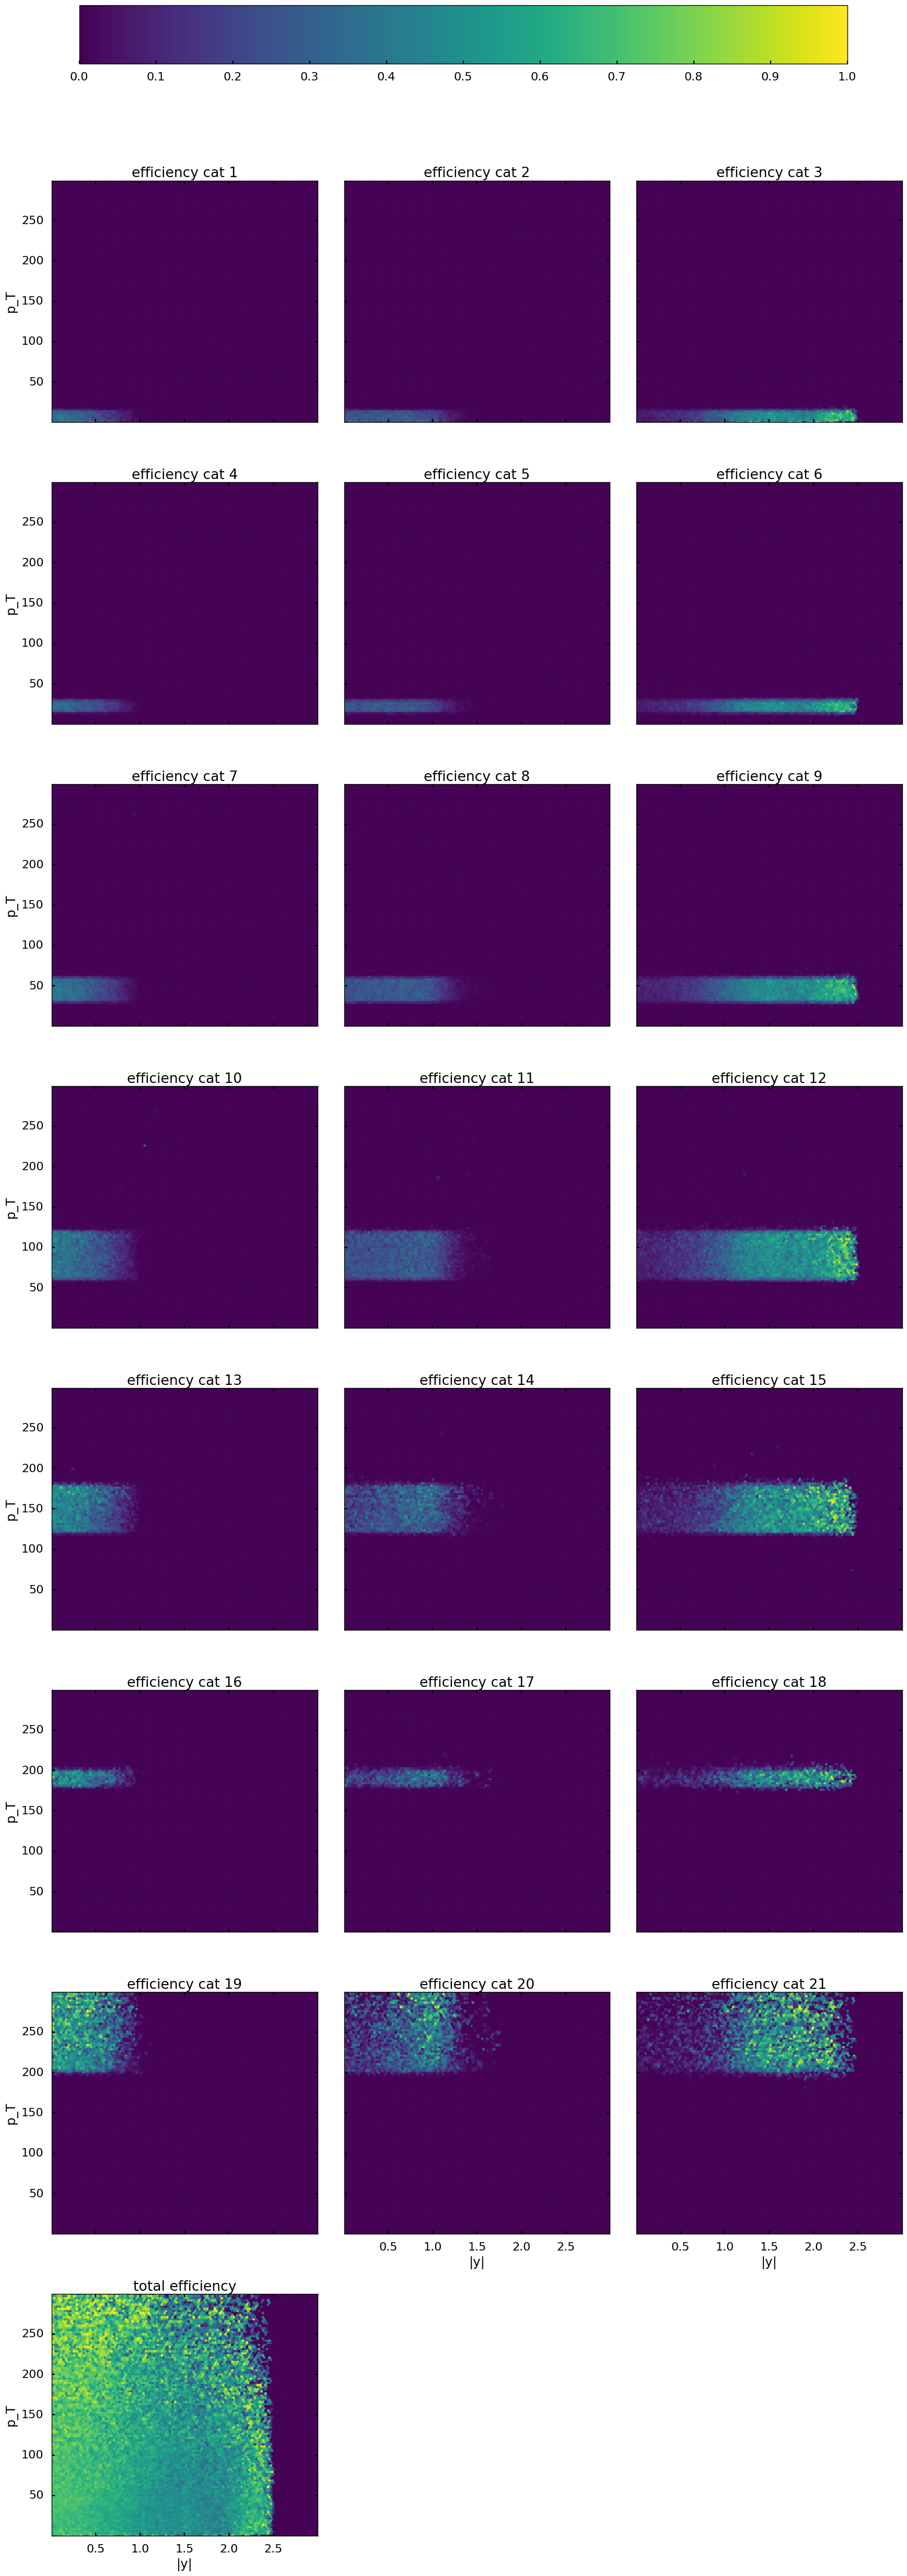

In [5]:
plot_efficiency_map(fitter,False)